# Matplotlib interactive examples

This is a small example of using Matplotlib for interactive data visualization. 

To get interactive visualization you must "run" the notebook cells (in order).  You can hit the "play" triangle above, or the "play-all" double triangle to run all the cells, or select a cell and hit "Shift-Enter".  Once active, you can zoom and pan in the provided data using the GUI toolbar at left of each figure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this sets up the Matplotlib interactive windows:
%matplotlib widget

# this changes the default date converter for better interactive plotting of dates:
plt.rcParams['date.converter'] = 'concise'

## Time series example: temperature at Dinosaur, Co

Data is from https://www.ncei.noaa.gov/pub/data/uscrn/products/hourly02/ and is hourly temperature and solar radiation at Dinosaur, Colorado.

### Load the data

In [8]:
#   Note the use of datetimes in the file complicate loading a bit.
#   We recommend using pandas or xarray for more elegant solutions
#   to handling complex timeseries data. 
with open('data/small.txt', 'r') as f:
    data = np.genfromtxt(f, dtype='datetime64[s],f,f,f')
datetime = np.array([d[0] for d in data])
dayofyear = np.array([d[1] for d in data])
temperature = np.array([d[2] for d in data])
solar = np.array([d[3] for d in data])

# make two-day smoothed versions:
temp_low = np.convolve(temperature, np.ones(48)/48, mode='same')
solar_low = np.convolve(solar, np.ones(48)/48, mode='same')

### Plot timeseries

Here we plot the time series, add labels, title, and a small annotation about where the data came from.  Using the toolbar on the left you can zoom in on the data to see, for instance, the day/night warming and cooling. You can also pan along the time series using the icon with four arrows.  Note that because we have said `sharex=True` when creating the axes, the time window remains connected in both time seroes.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
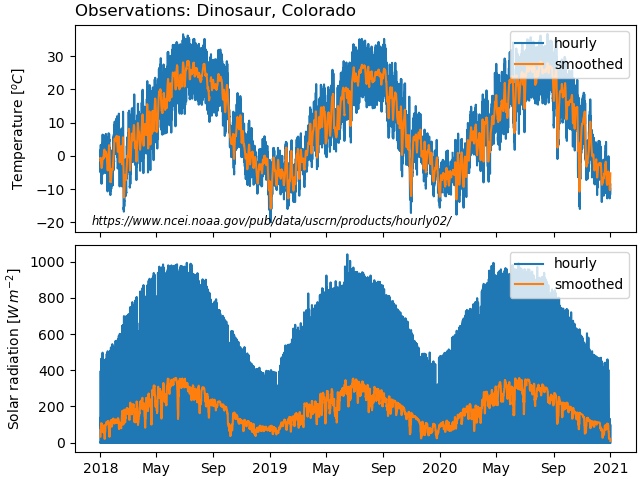

In [10]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

# temperature:
ax0.plot(datetime, temperature, label='hourly')
ax0.plot(datetime, temp_low, label='smoothed')
ax0.legend(loc='upper right')
ax0.set_ylabel('Temperature $[^oC]$')  # note the use of TeX math formatting

# solar-radiation:
ax1.plot(datetime, solar, label='hourly')
ax1.plot(datetime, solar_low, label='smoothed')
ax1.legend(loc='upper right')
ax1.set_ylabel('Solar radiation $[W\,m^{-2}]$')   # note the use of TeX math formatting

ax0.set_title('Observations: Dinosaur, Colorado', loc='left')
ax0.text(0.03, 0.03, 'https://www.ncei.noaa.gov/pub/data/uscrn/products/hourly02/', 
         fontsize='small', fontstyle='italic', transform=ax0.transAxes);

### Plot property-versus-property

Lets make a scatter plot of solar radiation versus temperature, colored by day of the year.  Note that we do not share the axes this time because the dynamic range of the hourly and smoothed data is different.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
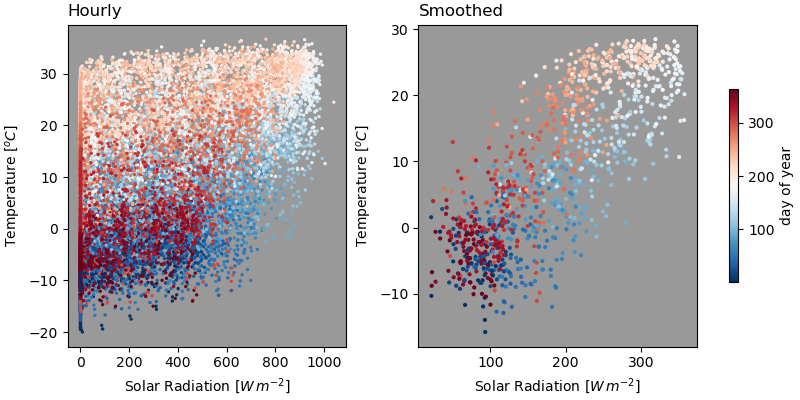

In [11]:
fig, [ax0, ax1] = plt.subplots(1, 2, constrained_layout=True, figsize=(8, 4))

ax0.set_facecolor('0.6')
sc = ax0.scatter(solar, temperature, c=dayofyear, s=2, cmap='RdBu_r')
ax0.set_xlabel('Solar Radiation $[W\,m^{-2}]$')
ax0.set_ylabel('Temperature $[^oC]$')
ax0.set_title('Hourly', loc='left')


ax1.set_facecolor('0.6')
sc = ax1.scatter(solar_low[::24], temp_low[::24], c=dayofyear[::24], s=4, cmap='RdBu_r')
ax1.set_xlabel('Solar Radiation $[W\,m^{-2}]$')
ax1.set_ylabel('Temperature $[^oC]$')
ax1.set_title('Smoothed', loc='left')

fig.colorbar(sc, ax=[ax0, ax1], shrink=0.6, label='day of year')

## Image data: global land-surface temperature

Matplotlib can also plot two-dimensional data as in this example of land surface temperature.  Note that for geographic data a package like cartopy or metpy is recommended.  

### Load the data

In [12]:
dat = np.genfromtxt('data/MOD_LSTD_E_2021-08-29_gs_720x360.CSV', delimiter=',')
dat = np.where(dat<1000, dat, np.NaN)
dat = dat[::-1, :]
lon = np.arange(-180.0, 180.1, 0.5)
lat = np.arange(-90.0, 90.1, 0.5)
date = '2021-08-29 to 2021-09-05'
source = 'https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MOD_LSTD_E&date=2021-09-01'

### Plot data

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
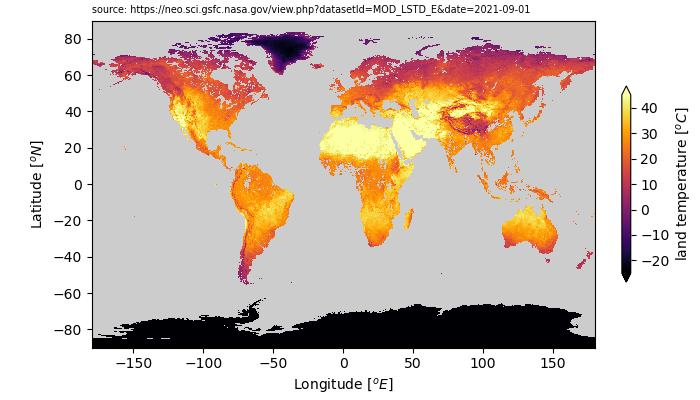

In [15]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 4))
ax.set_facecolor('0.8')
pc = ax.pcolormesh(lon, lat, dat, shading='auto', cmap='inferno')
ax.set_aspect(1.3)
ax.set_xlabel('Longitude $[^o E]$')
ax.set_ylabel('Latitude $[^o N]$')
fig.colorbar(pc, shrink=0.6, extend='both', label='land temperature $[^oC]$');
ax.set_title(f'source: {source}', loc='left', fontsize='x-small');